## Bu projede San Francisco BART istasyonuyla ilgi li veri analizi yapıp aşağıdaki soruların cevabını bulacağız.
1. En yoğun BART istasyonu hangisidir?
2. En az popüler olan BART rotası hangisidir?
3. Koltukta yolculuk yapmak istiyorsanız Berkeley'den San Fransisco'ya gitmek için en iyi zaman ne zamandır?
4. Haftanın en yoğun günü hangisidir?
5. BART'ı gece geç saatte kaç kişi kullanıyor?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
#dosyaya resim eklemek istedim fakat kodum çalışmadı,

In [2]:
df1=pd.read_csv('date-hour-soo-dest-2016.csv')

In [3]:
df2=pd.read_csv('date-hour-soo-dest-2017.csv')

In [4]:
df=pd.concat([df1,df2])
#her iki datayı concat koduyla merge ettik

In [5]:
df.tail()

,Date,Hour,Origin Station,Destination Station,Trip Count
9974090,2018-01-01,2,WOAK,POWL,3
9974091,2018-01-01,2,WOAK,RICH,1
9974092,2018-01-01,2,WOAK,SBRN,1
9974093,2018-01-01,2,WOAK,SHAY,2
9974094,2018-01-01,2,WOAK,WOAK,2


In [6]:
df.shape

(19947757, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19947757 entries, 0 to 9974094
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 913.1+ MB


In [8]:
df["Date"]=pd.to_datetime(df['Date'])

df["Day"]=df["Date"].dt.dayofweek
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year


df['WeekDay']=df['Date'].dt.day_name()
df['Month_Name']=df['Date'].dt.month_name()

df.drop("Date",axis=1,inplace=True)

In [9]:
days={"Monday":"1",
              "Tuesday":"2",
              "Wednesday":"3",
              "Thursday":"4",
              "Friday":"5",
              "Saturday":"6",
              "Sunday":"7",
             }
df.WeekDay.replace(days,inplace=True) 

In [10]:
df['Month_Name']=df['Month_Name'].replace(['January'],'1')
df['Month_Name']=df['Month_Name'].replace(['February'],'2')
df['Month_Name']=df['Month_Name'].replace(['March'],'3')
df['Month_Name']=df['Month_Name'].replace(['April'],'4')
df['Month_Name']=df['Month_Name'].replace(['May'],'5')
df['Month_Name']=df['Month_Name'].replace(['June'],'6')
df['Month_Name']=df['Month_Name'].replace(['July'],'7')
df['Month_Name']=df['Month_Name'].replace(['August'],'8')
df['Month_Name']=df['Month_Name'].replace(['September'],'9')
df['Month_Name']=df['Month_Name'].replace(['October'],'10')
df['Month_Name']=df['Month_Name'].replace(['November'],'11')
df['Month_Name']=df['Month_Name'].replace(['December'],'12')

In [11]:
#aşağıda bu integer sutunlar sorun çıkardı yazı olduğu için, hepsini böyle değiştirdim.
df['Origin Station']=df['Origin Station'].replace(['POWL'],'1')
df['Origin Station']=df['Origin Station'].replace(['EMBR'],'2') 
df['Origin Station']=df['Origin Station'].replace(['CIVC'],'3')
df['Origin Station']=df['Origin Station'].replace(['MONT'],'4') 
df['Origin Station']=df['Origin Station'].replace(['16TH'],'5')
df['Origin Station']=df['Origin Station'].replace(['DBRK'],'6') 
df['Origin Station']=df['Origin Station'].replace(['12TH'],'7')
df['Origin Station']=df['Origin Station'].replace(['24TH'],'8')
df['Origin Station']=df['Origin Station'].replace(['19TH'],'9')
df['Origin Station']=df['Origin Station'].replace(['SFIA'],'10') 
df['Origin Station']=df['Origin Station'].replace(['MCAR'],'11')
df['Origin Station']=df['Origin Station'].replace(['FTVL'],'12') 
df['Origin Station']=df['Origin Station'].replace(['DALY'],'13')
df['Origin Station']=df['Origin Station'].replace(['COLS'],'14') 
df['Origin Station']=df['Origin Station'].replace(['BALB'],'15')
df['Origin Station']=df['Origin Station'].replace(['DELN'],'16')
df['Origin Station']=df['Origin Station'].replace(['LAKE'],'17')
df['Origin Station']=df['Origin Station'].replace(['FRMT'],'18') 
df['Origin Station']=df['Origin Station'].replace(['GLEN'],'19')
df['Origin Station']=df['Origin Station'].replace(['SANL'],'20') 
df['Origin Station']=df['Origin Station'].replace(['PITT'],'21')
df['Origin Station']=df['Origin Station'].replace(['BAYF'],'22') 
df['Origin Station']=df['Origin Station'].replace(['ASHB'],'23')
df['Origin Station']=df['Origin Station'].replace(['CONC'],'24')
df['Origin Station']=df['Origin Station'].replace(['HAYW'],'25')
df['Origin Station']=df['Origin Station'].replace(['WCRK'],'26') 
df['Origin Station']=df['Origin Station'].replace(['WOAK'],'27')
df['Origin Station']=df['Origin Station'].replace(['RICH'],'28') 
df['Origin Station']=df['Origin Station'].replace(['DUBL'],'29')
df['Origin Station']=df['Origin Station'].replace(['ROCK'],'30') 
df['Origin Station']=df['Origin Station'].replace(['NBRK'],'31')
df['Origin Station']=df['Origin Station'].replace(['PLZA'],'32')
df['Origin Station']=df['Origin Station'].replace(['PHIL'],'33')
df['Origin Station']=df['Origin Station'].replace(['MLBR'],'34') 
df['Origin Station']=df['Origin Station'].replace(['UCTY'],'35')
df['Origin Station']=df['Origin Station'].replace(['SBRN'],'36') 
df['Origin Station']=df['Origin Station'].replace(['SHAY'],'37')
df['Origin Station']=df['Origin Station'].replace(['OAKL'],'38') 
df['Origin Station']=df['Origin Station'].replace(['COLM'],'39')
df['Origin Station']=df['Origin Station'].replace(['WDUB'],'40')
df['Origin Station']=df['Origin Station'].replace(['SSAN'],'41')
df['Origin Station']=df['Origin Station'].replace(['LAFY'],'42') 
df['Origin Station']=df['Origin Station'].replace(['CAST'],'43')
df['Origin Station']=df['Origin Station'].replace(['ORIN'],'44') 
df['Origin Station']=df['Origin Station'].replace(['NCON'],'45')
df['Origin Station']=df['Origin Station'].replace(['WARM'],'46') 
                    
                               
    

In [12]:
df['Destination Station']=df['Destination Station'].replace(['POWL'],'1')
df['Destination Station']=df['Destination Station'].replace(['EMBR'],'2') 
df['Destination Station']=df['Destination Station'].replace(['CIVC'],'3')
df['Destination Station']=df['Destination Station'].replace(['MONT'],'4') 
df['Destination Station']=df['Destination Station'].replace(['16TH'],'5')
df['Destination Station']=df['Destination Station'].replace(['DBRK'],'6') 
df['Destination Station']=df['Destination Station'].replace(['12TH'],'7')
df['Destination Station']=df['Destination Station'].replace(['24TH'],'8')
df['Destination Station']=df['Destination Station'].replace(['19TH'],'9')
df['Destination Station']=df['Destination Station'].replace(['SFIA'],'10') 
df['Destination Station']=df['Destination Station'].replace(['SFIA'],'10') 
df['Destination Station']=df['Destination Station'].replace(['MCAR'],'11')
df['Destination Station']=df['Destination Station'].replace(['FTVL'],'12') 
df['Destination Station']=df['Destination Station'].replace(['DALY'],'13')
df['Destination Station']=df['Destination Station'].replace(['COLS'],'14') 
df['Destination Station']=df['Destination Station'].replace(['BALB'],'15')
df['Destination Station']=df['Destination Station'].replace(['DELN'],'16')
df['Destination Station']=df['Destination Station'].replace(['LAKE'],'17')
df['Destination Station']=df['Destination Station'].replace(['FRMT'],'18') 
df['Destination Station']=df['Destination Station'].replace(['GLEN'],'19')
df['Destination Station']=df['Destination Station'].replace(['SANL'],'20') 
df['Destination Station']=df['Destination Station'].replace(['PITT'],'21')
df['Destination Station']=df['Destination Station'].replace(['BAYF'],'22') 
df['Destination Station']=df['Destination Station'].replace(['ASHB'],'23')
df['Destination Station']=df['Destination Station'].replace(['CONC'],'24')
df['Destination Station']=df['Destination Station'].replace(['HAYW'],'25')
df['Destination Station']=df['Destination Station'].replace(['WCRK'],'26') 
df['Destination Station']=df['Destination Station'].replace(['WOAK'],'27')
df['Destination Station']=df['Destination Station'].replace(['RICH'],'28') 
df['Destination Station']=df['Destination Station'].replace(['DUBL'],'29')
df['Destination Station']=df['Destination Station'].replace(['ROCK'],'30') 
df['Destination Station']=df['Destination Station'].replace(['NBRK'],'31')
df['Destination Station']=df['Destination Station'].replace(['PLZA'],'32')
df['Destination Station']=df['Destination Station'].replace(['PHIL'],'33')
df['Destination Station']=df['Destination Station'].replace(['MLBR'],'34') 
df['Destination Station']=df['Destination Station'].replace(['UCTY'],'35')
df['Destination Station']=df['Destination Station'].replace(['SBRN'],'36') 
df['Destination Station']=df['Destination Station'].replace(['SHAY'],'37')
df['Destination Station']=df['Destination Station'].replace(['OAKL'],'38') 
df['Destination Station']=df['Destination Station'].replace(['COLM'],'39')
df['Destination Station']=df['Destination Station'].replace(['WDUB'],'40')
df['Destination Station']=df['Destination Station'].replace(['SSAN'],'41')
df['Destination Station']=df['Destination Station'].replace(['LAFY'],'42') 
df['Destination Station']=df['Destination Station'].replace(['CAST'],'43')
df['Destination Station']=df['Destination Station'].replace(['ORIN'],'44') 
df['Destination Station']=df['Destination Station'].replace(['NCON'],'45')
df['Destination Station']=df['Destination Station'].replace(['WARM'],'46') 

In [13]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,Day,Month,Year,WeekDay,Month_Name
0,0,7,7,1,4,1,2016,5,1
1,0,7,5,1,4,1,2016,5,1
2,0,7,8,4,4,1,2016,5,1
3,0,7,23,4,4,1,2016,5,1
4,0,7,15,2,4,1,2016,5,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19947757 entries, 0 to 9974094
Data columns (total 9 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   Day                  int64 
 5   Month                int64 
 6   Year                 int64 
 7   WeekDay              object
 8   Month_Name           object
dtypes: int64(5), object(4)
memory usage: 1.5+ GB


In [15]:
df3=pd.read_csv('station_names.csv')
#istasyon isimleri dosyası

In [16]:
df3.drop(["Unnamed: 0"],axis=1,inplace=True)

In [17]:
df3.head(46)

,station_name_sort,Station Name
0,RM,Richmond
1,EN,El Cerrito Del Norte
2,EP,El Cerrito Plaza
3,NB,North Berkeley
4,BK,Berkeley
5,AS,Ashby
6,MA,MacArthur
7,19,19th Street Oakland
8,12,12th Street / Oakland City Center
9,LM,Lake Merritt


1. Which BART station is the busiest?

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'istasyon dağılımı')

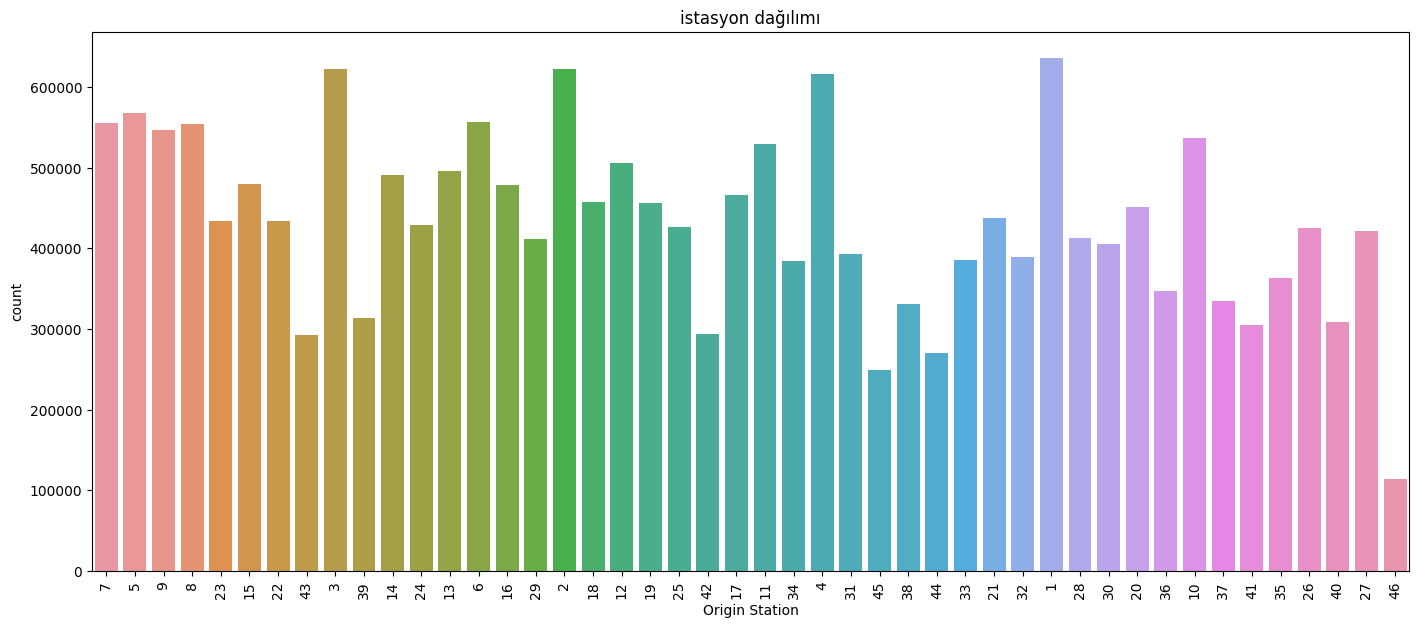

In [19]:
plt.figure(figsize=(17,7))
sns.countplot(x=df['Origin Station'])
plt.xticks(rotation=90);
plt.title('istasyon dağılımı')
#En yoğun istasyon Powell Street.

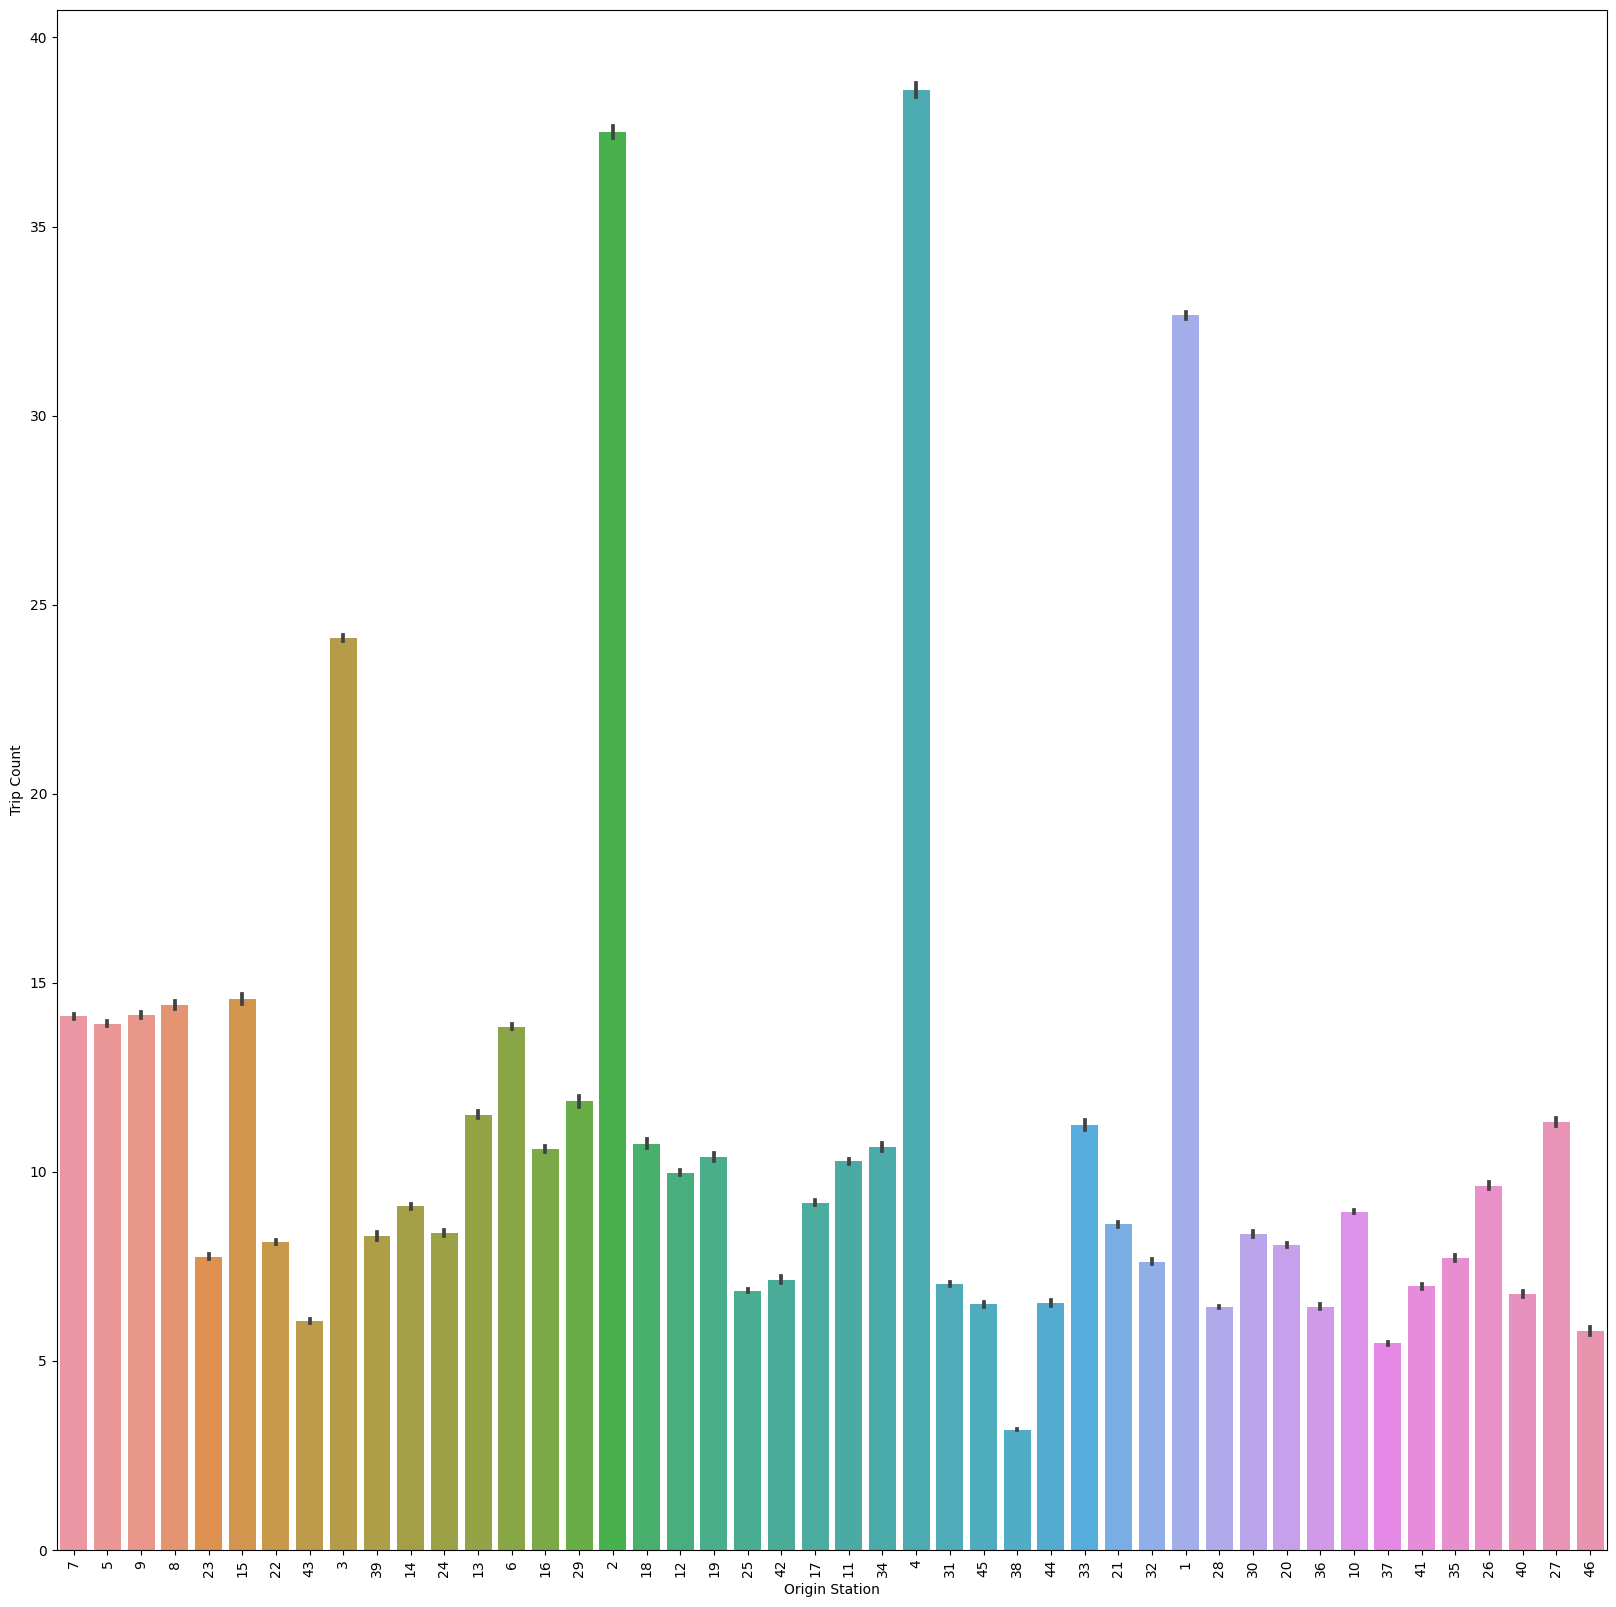

In [20]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90);
sns.barplot(x=df['Origin Station'],y=df['Trip Count']);
#En az yolcuya sahip istasyon 38. istasyon yani "Oakland International Airport"
#trip counta göre istasonlara baktım

Text(0.5, 1.0, 'istasyon')

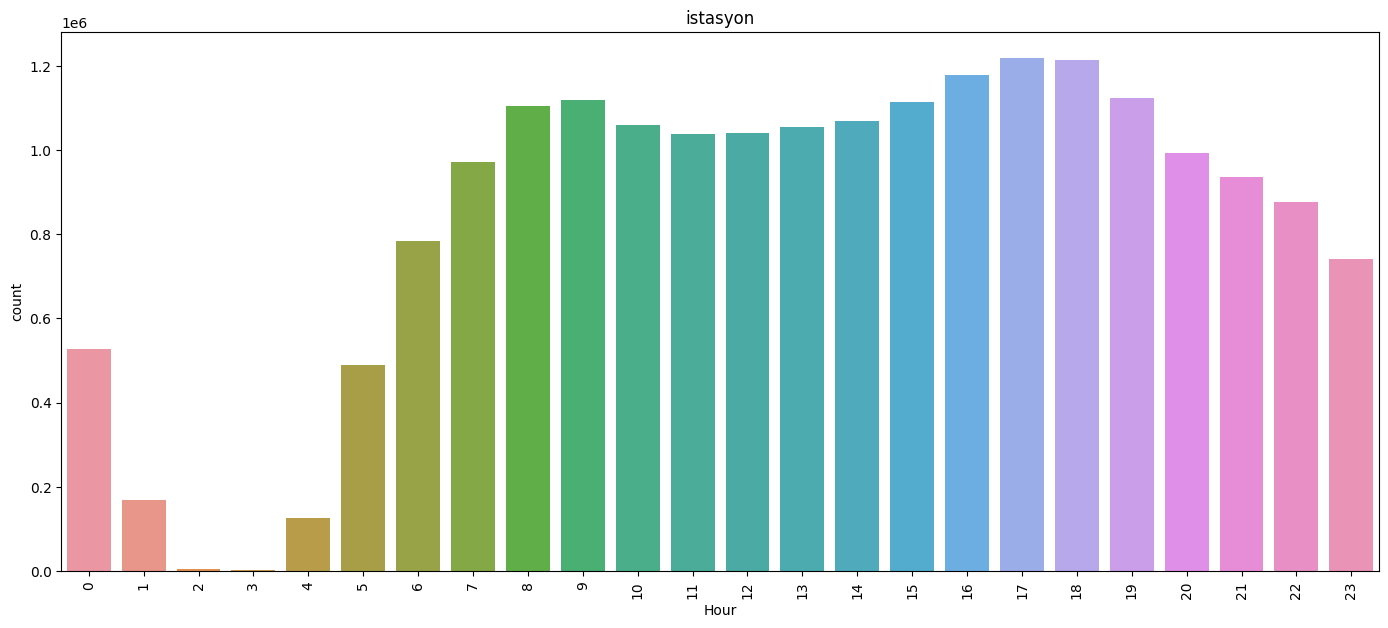

In [21]:
plt.figure(figsize=(17,7))
sns.countplot(x=df['Hour'])
plt.xticks(rotation=90);
plt.title('istasyon')
#en yoğun saat akşam 5-6

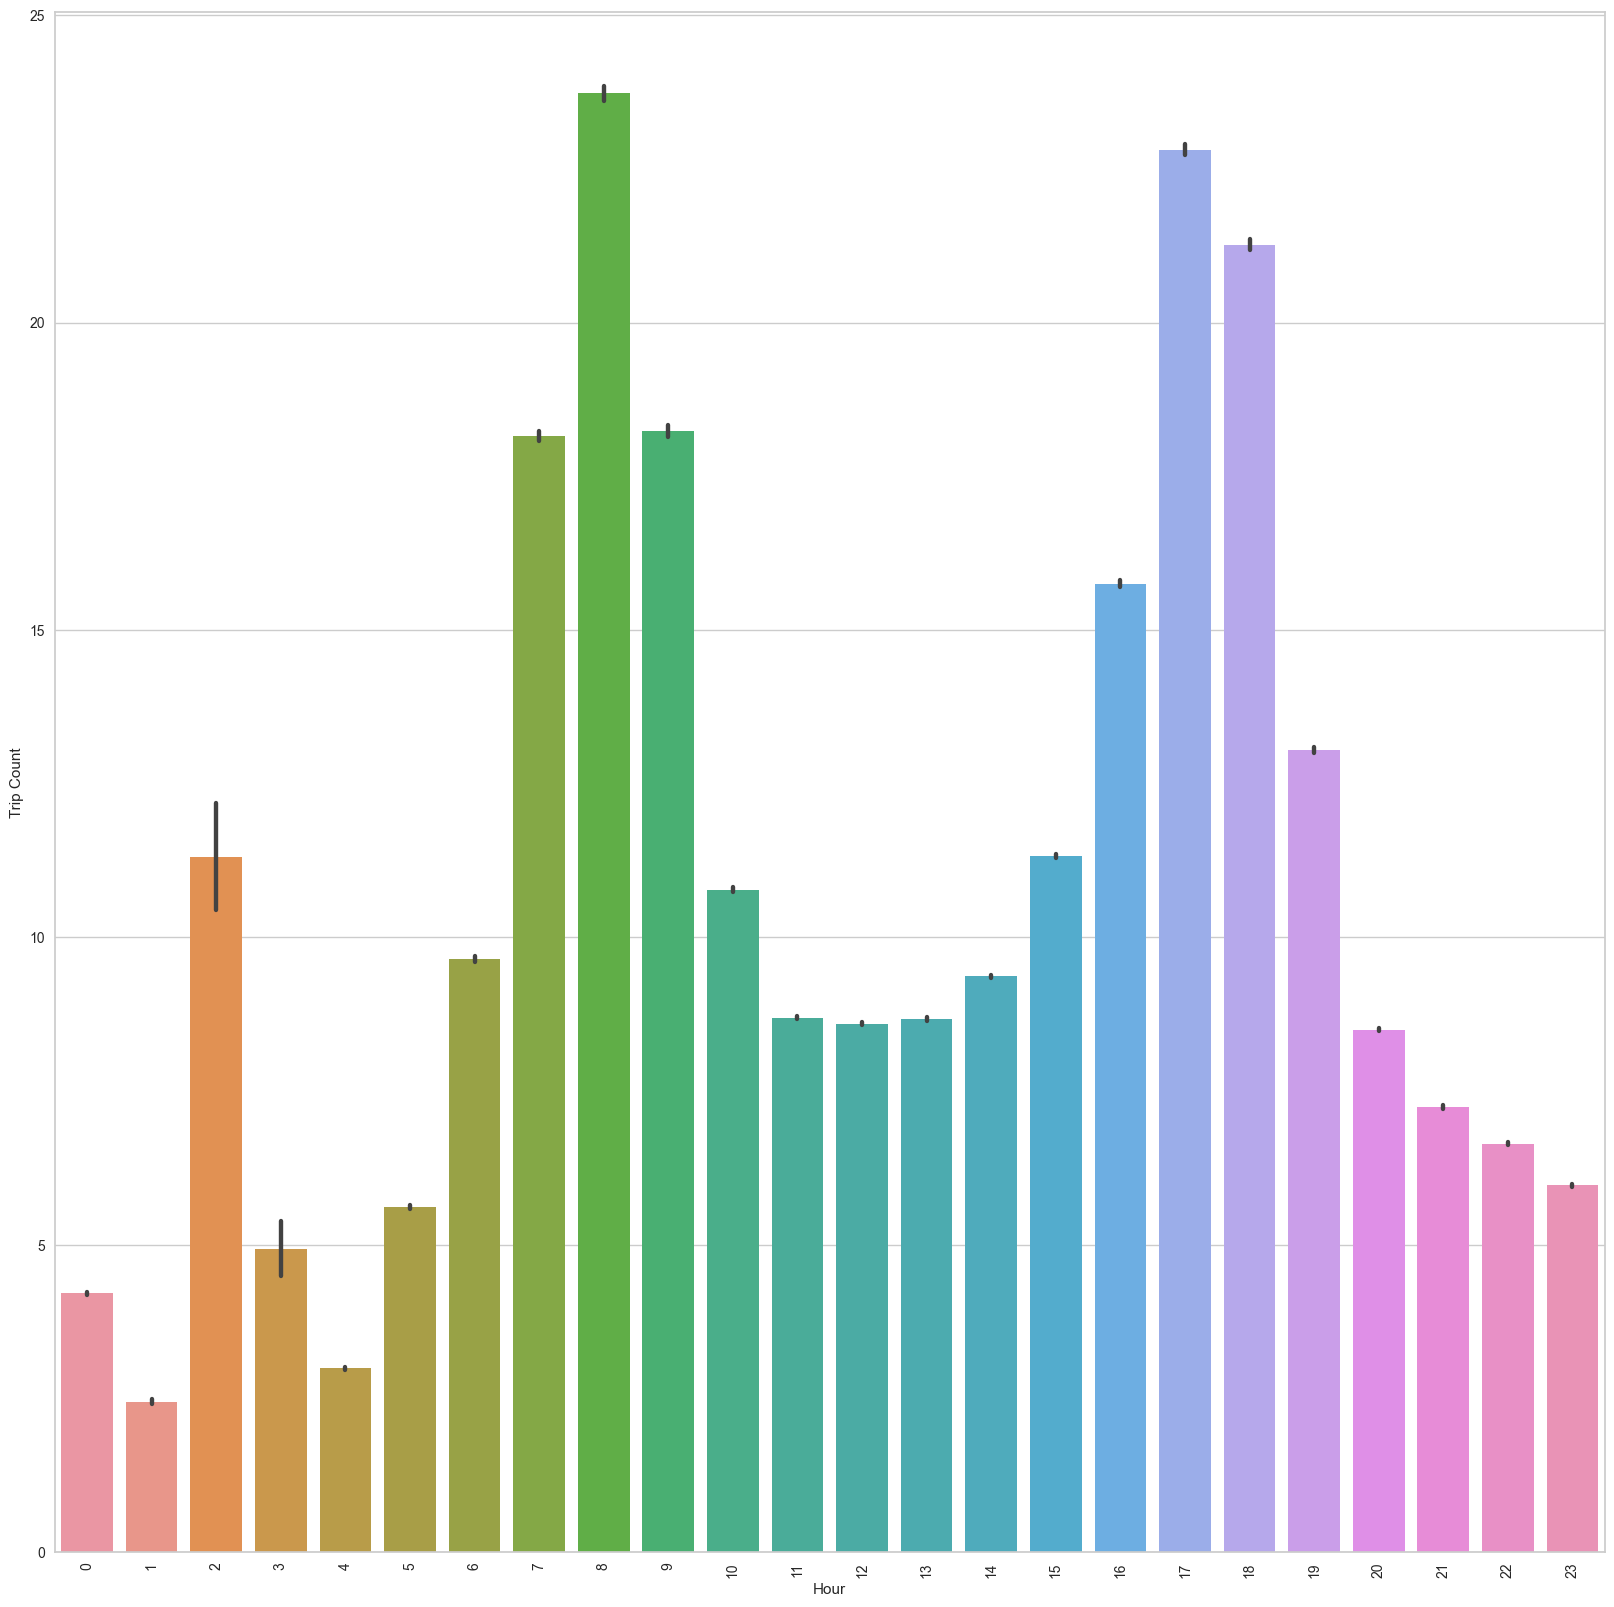

In [46]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90);
sns.barplot(x=df['Hour'],y=df['Trip Count']);
#trip counta göre en yoğun saat sabah 9

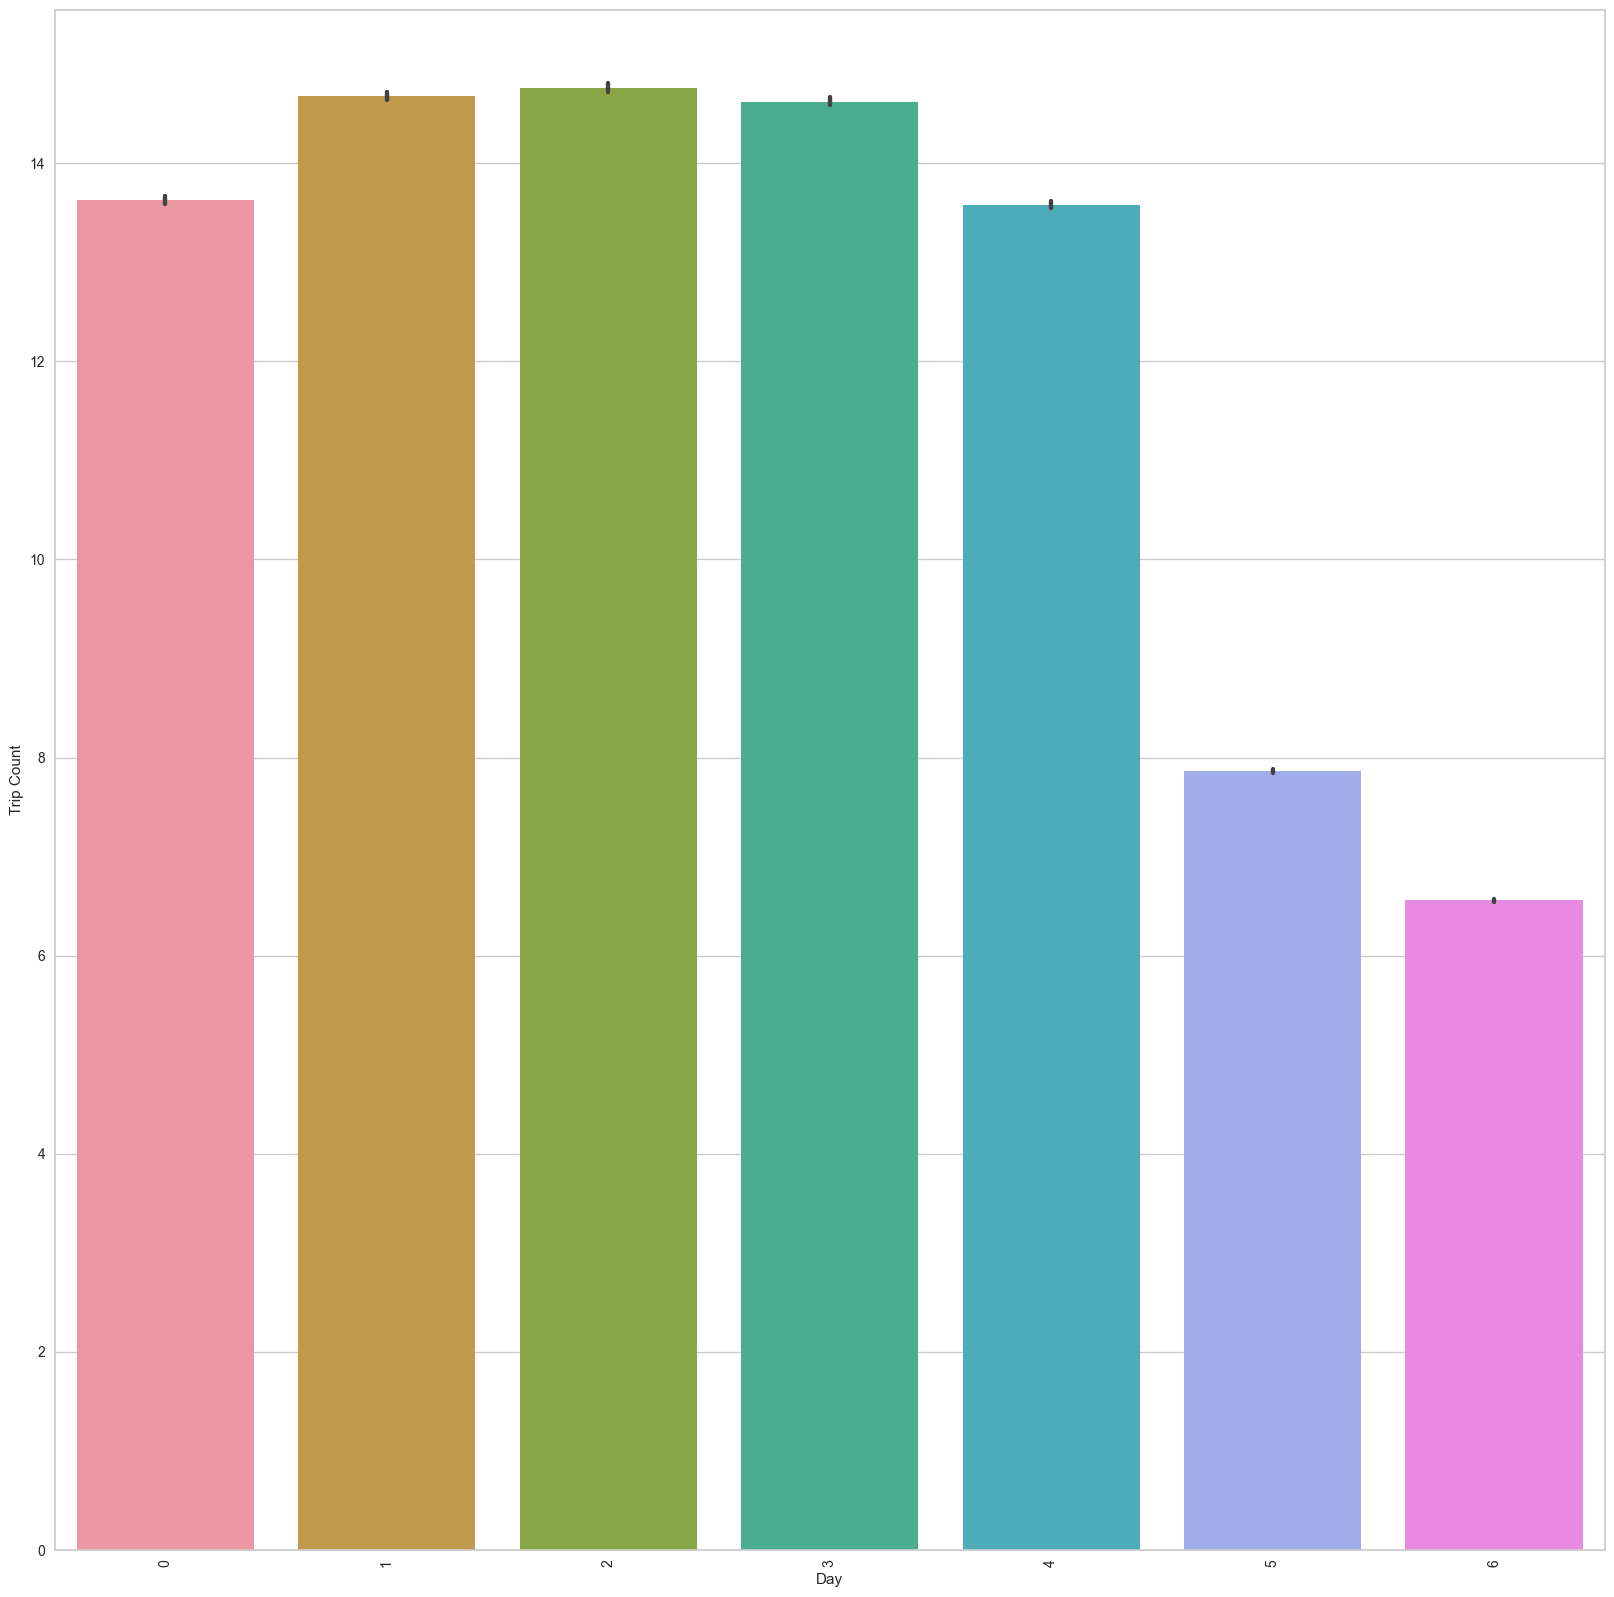

In [47]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90);
sns.barplot(x=df['Day'],y=df['Trip Count']);
#haftanın en yoğun günü çarşamba günü, en seyrek pazar

In [48]:
#22:00 - 06:00 saatlerini filtreledik
filtered_df = df[(df['Hour'] >= 22) | (df['Hour'] < 6)]
toplam_trip_count = filtered_df['Trip Count'].sum()
print(toplam_trip_count)

16055441


In [49]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,Day,Month,Year,WeekDay,Month_Name
0,0,7,7,1,4,1,2016,5,1
1,0,7,5,1,4,1,2016,5,1
2,0,7,8,4,4,1,2016,5,1
3,0,7,23,4,4,1,2016,5,1
4,0,7,15,2,4,1,2016,5,1


In [50]:
# Sadece Berkeley ve San Fransisco istasyonları arasındaki seyahatleri filtrele
filtered_df = df[(df['Origin Station'] == '6') & (df['Destination Station'] == '10')]

# Tarih ve istasyonlara göre grupla ve yolcu sayısını hesapla
grouped_df = filtered_df.groupby(['Day','Month','Year', 'Origin Station', 'Destination Station']).sum().reset_index()


In [51]:
print(grouped_df.to_string())
#burada Berkeley ile Sanfransisco arasında oturarak yolculuk edilecek saati aradım ama saati rakama dönüştürdüğüm halde burada 3-4 basamaklı sayılar çıktı Hours ta

     Day  Month  Year Origin Station Destination Station  Hour  Trip Count
0      0      1  2016              6                  10  1054         494
1      0      1  2017              6                  10  1121         397
2      0      2  2016              6                  10  1274         644
3      0      2  2017              6                  10   979         434
4      0      3  2016              6                  10  1059         962
5      0      3  2017              6                  10  1041         635
6      0      4  2016              6                  10  1012         515
7      0      4  2017              6                  10   951         570
8      0      5  2016              6                  10  1302         969
9      0      5  2017              6                  10  1282         755
10     0      6  2016              6                  10  1020         701
11     0      6  2017              6                  10  1036         598
12     0      7  2016    

In [52]:
df4=pd.read_csv('station_coords.csv')  #istasyonların enlem boylam dosyası

In [53]:
df4.drop(["Unnamed: 0"],axis=1,inplace=True)

In [54]:
df4.head()

,station_name,latitute,longitude
0,12TH,798,702
1,19TH,798,655
2,MCAR,802,607
3,16TH,375,948
4,CIVC,397,915


In [55]:
#SanFransisco ve Berkeley arasındaki mesafeyi ölçtük

import math

# İstasyonların koordinatlarını tanımladık
sfia_coordinates = (485, -1321)  # San Fransisco'nun koordinatları (latitude, longitude)
bery_coordinates = (1535, -1895)  # Berkeley'nin koordinatları (latitude, longitude)

# İki istasyon arasındaki mesafeyi hesapladı
distance = math.sqrt((sfia_coordinates[0] - bery_coordinates[0])**2 + (sfia_coordinates[1] - bery_coordinates[1])**2)

print("İki istasyon arasındaki mesafe:", distance, "birim")

İki istasyon arasındaki mesafe: 1196.6519961960537 birim


In [56]:
x=df[['Origin Station','Destination Station','Hour','Day',
       'Month', 'Year', 'WeekDay', 'Month_Name']]
y=df[['Trip Count']]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
dt=DesicionTreeRegressor()

In [71]:
model1=dt.fit(x_train, y_train)

In [72]:
tahmin1=model1.predict(x_test)

In [73]:
r2_score(tahmin1,y_test)

0.8755551764157345

In [74]:
mean_squared_error(tahmin1,y_test)**.5

11.420485675427452

In [ ]:
#model başarılı oldu,diğer algortimalar yüksek başarı vermediği için sildim

In [75]:
df.to_pickle('bart_project.pkl')

In [ ]:
#pip install pycaret

In [ ]:
#from pycaret.regression import* 

In [ ]:
#df=pd.read_pickle('bart_project.pkl')

In [ ]:
#setup(data=df,target='Trip Count')

In [ ]:
#bestmodel=compare_models()

In [ ]:
#best_model=create_model('')

In [ ]:
#plot_model(best_model,plot='feature')